##Introduction to regression with Neural Networks in Tensorflow

there are many  definitions for a regression problem but in our case, we're going to simplify it:
Predicting a numerical viriable based on some other combination of variable based on some other combination pf variables, even shorter...predicting a number.

In [1]:
##Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


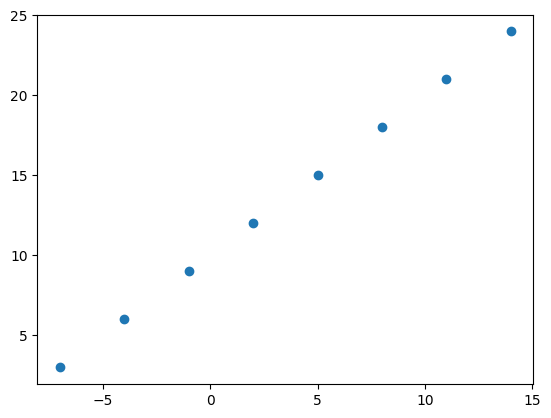

In [2]:
#Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#create
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,Y)

In [3]:
Y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#input and output shape

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom","garbage"])
house_price = tf.constant([929700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garbage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([929700], dtype=int32)>)

In [5]:
X[0], Y[0]

(-7.0, 3.0)

In [6]:
X[1], Y[1]

(-4.0, 6.0)

In [7]:
input_shape=X[0].shape
output_shape=Y[0].shape
input_shape, output_shape


((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], Y[0]

(-7.0, 3.0)

In [10]:
#Turn our Numpy arrays into tensors
X= tf.cast(tf.constant(X), dtype=tf.float32) #converting np to tensors
Y= tf.cast(tf.constant(Y), dtype=tf.float32) #converting np to tensors
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape=X[0].shape
output_shape=Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

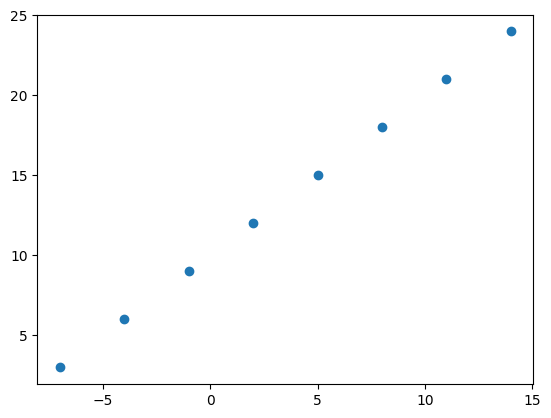

In [12]:
plt.scatter(X,Y)

##Steps in modelling with tensorflow

1.Creating a model - define the input and output layers, as well as the hidden layers of deep learning model.

2, Compilling a model - define the loss function(in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patter its learning) and evaluation metrics(what we can use to interpret the performance of our model).

3.Fitting a model - letting the model try to find patterns between X&Y(features and label)

In [13]:
#set random seed
tf.random.set_seed(42)

#1. create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)]) #same defining a model
#model.add(tf.keras.layers.Dense(1)) #same

#2.Compile the model
#mae: mean absolute error
#SGD: Stochastic Gradient Desent
model.compile(loss=tf.keras.losses.mae,
              optimizer="sgd", #tf.keras.optimizers.SGD() = "sgd"
              metrics=["mae"])

#3.Fit the model only work in dtype=float32 or 32bit
#epochs=5 or 5 opportunity
#requires tf.expand_dims
model.fit(tf.expand_dims(X, axis=-1),Y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 908ms/step - loss: 9.5106 - mae: 9.5106
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 9.3781 - mae: 9.3781
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 9.2456 - mae: 9.2456
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 9.1131 - mae: 9.1131
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 8.9806 - mae: 8.9806


In [14]:
#check out x and y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
#try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 167ms/step


array([[22.401907]], dtype=float32)

In [16]:
y_pred + 11

array([[33.40191]], dtype=float32)

Improve our model
We can improve our model, by altering the steps we took to create a model.

1. **Create a model - here we might add more layers
increase the number of hidden units(all call neurons)
within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model - here we might change the optimization function or perhaps the ***learning rate** of optimization function

3. **Fitting a model** here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model examples to learn from).



In [17]:
#let rebuild our model

#1.Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model(this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 678ms/step - loss: 8.6227 - mae: 8.6227
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.4902 - mae: 8.4902
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 8.3577 - mae: 8.3577
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 8.2252 - mae: 8.2252
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 8.0927 - mae: 8.0927
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 7.9602 - mae: 7.9602
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 7.8277 - mae: 7.8277
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 7.6952 - mae: 7.6952
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 7.5627 - mae: 7.5627
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 7.4325 - mae: 7.4325
Epoch 11/100
1/1 [==============================] - 0s 20ms/step - l

In [18]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 291ms/step


array([[29.817099]], dtype=float32)

##Smaller to larger model

In [20]:
from keras.src.engine.training import optimizer
#let's see if we can make another to improve our model
#1 create the model (this time with extra hidden layer with 100 hidden units)
# ***relu***
#hyperparameter layers: tf.keras.layers.Dense(50, activation=None)
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation="relu")
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)])

#2 Compile our model
#lr = learning rate or in code *** learning_rate
#lr is prone to miscalculation
#learning rate most important basis of getting the best prediction
model.compile(loss="mae", #shortcut of tf.keras.losses.mae
                   #optimizer=tf.keras.optimizers.SGD(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics=["mae"])
#3 fit the model but multiple epochs(possibilities)
model.fit(tf.expand_dims(X,axis=-1),Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.4122 - mae: 12.4122
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.7091 - mae: 11.7091
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 11.0001 - mae: 11.0001
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.2817 - mae: 10.2817
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 9.5510 - mae: 9.5510
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 8.8057 - mae: 8.8057
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 8.0438 - mae: 8.0438
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 7.2634 - mae: 7.2634
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 6.8614 - mae: 6.8614
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 7.1098 - mae: 7.1098
Epoch 11/100
1/1 [==============================] - 0s 21ms/ste

In [21]:
#lets remid ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
model.predict([17.0]) #more accurate in reference

1/1 [==============================] - 0s 191ms/step


array([[27.343918]], dtype=float32)

##Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

Build a model -> fit it -> evaluate it -> tweak a model->fit it -> evaluate it -> tweak a model->fit it -> evaluate it...

#whebnit comes to evaluation... there are 3 words you should memorize
"Visualize, visualize, visualize"

It's a good idea to visualize:
*the data -  what data are we working with? what does it look like?

*The model itself - what does our model look like?

*The training of a model = how does a model perform while it learns

*The predictions of the model - how do rthe predictions of a model line up against the ground truth(the original labels)?





In [23]:
#Make a bigger dataset
X= tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
#make labels for the dataset
Y=X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

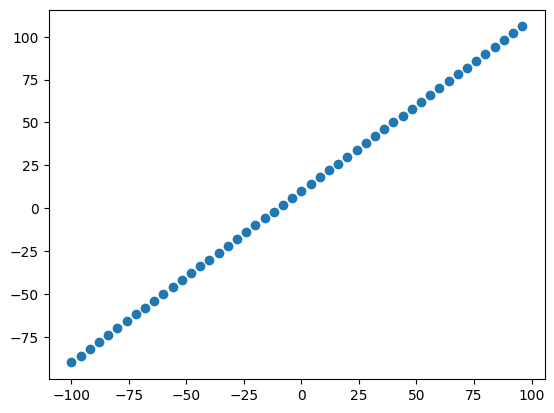

In [25]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

###The 3 Sets...

*Training set - the model learns from this data, which is typically 70-80& of the total data you have available.

*Validation set -  the model gets tuned on this data which is typically 10-15% of the data available.(tweaking the data)

*Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [26]:
#check the lenght of how many ssample we have
len(X)

50

In [27]:
#Split the data into train and test sets
X_train = X[:40] # first 40 are training samples(80% of the data)
Y_train = Y[:40]
X_test = X[40:] #last 10 are testing samples(20& of the data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

###Visualzing the data
Now we've got our data training and test sets...Let's visualize it again!


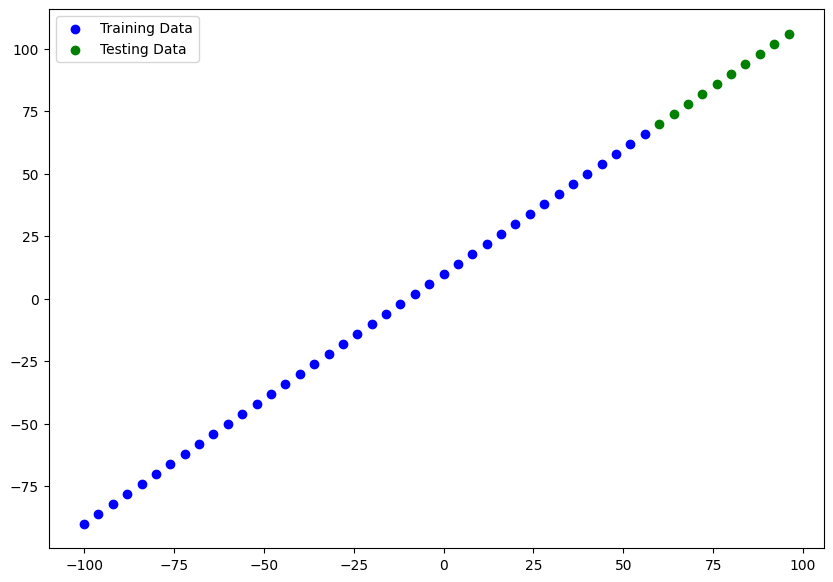

In [28]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training Data")
#plot training data in green
plt.scatter(X_test, Y_test, c="g", label="Testing Data")
#Show a legend
plt.legend();




In [29]:
#let's have a look at how to build a neural network for our data

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3.fit the model
#model.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=100)
#model.summary()

In [30]:
X[0],Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [31]:
#lets create a model which build automatically by
#defining the *input_shape* argrument in the first layer
tf.random.set_seed(42)

#1.create a model(same above)
#one shape only X[0] one input, Y[0] one output
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Total params - total number of parameters in the model
*Trainable parameters -  these are the parameters(patterns) the model can update as it trains.

*Non-trainable params - these parameters aren't updated during training(this is typical when you bring in already learn patterns from other models during transfer learning)

📚Resources: for a more in-depth overview of trainable parameters within a layer, check out MIT's introduction to deep learning video.

🔧Exercise: Try to playing around with the number of hidden units in the dense layer, see how that effects the number of parameters(total and trainable) by calling model summary().


In [33]:
#lets fit our model in training data
#verbose=0 silent,verbose=1 standard
model.fit(tf.expand_dims(X_train, axis=-1), Y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 28ms/step - loss: 18.8521 - mae: 18.8521
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 11.5672 - mae: 11.5672
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 11.5636 - mae: 11.5636
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 9.3987 - mae: 9.3987
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 10.2833 - mae: 10.2833
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 9.5314 - mae: 9.5314
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 8.6543 - mae: 8.6543
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0472 - mae: 9.0472
Epoch 9/100
2/2 [==============================] - 0s 44ms/step - loss: 18.9697 - mae: 18.9697
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 10.2325 - mae: 10.2325
Epoch 11/100
2/2 [==============================] - 0s 11m

In [34]:
#1 create a model
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="model_1")

#2 compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3 fit the model
model.fit(tf.expand_dims(X_train,axis=-1), Y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 2s 24ms/step - loss: 30.2546 - mae: 30.2546
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 26.2341 - mae: 26.2341
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 32.2495 - mae: 32.2495
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 23.6675 - mae: 23.6675
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 14.1104 - mae: 14.1104
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 11.2920 - mae: 11.2920
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 12.3076 - mae: 12.3076
Epoch 8/100
2/2 [==============================] - 0s 18ms/step - loss: 10.9290 - mae: 10.9290
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 38.3892 - mae: 38.3892
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 25.9152 - mae: 25.9152
Epoch 11/100
2/2 [==============================]

In [35]:
#Get the summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


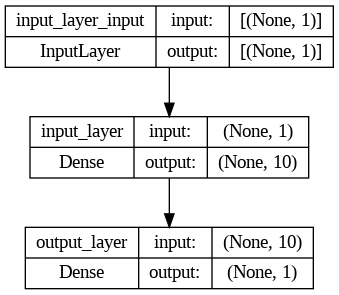

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

Visualizing our model's predictions

To visualize predictions, its a good idea to plot the against the ground truth labels.

Often you'll see this in the form of 'y_test' or 'y_true' versus 'y_pred'(ground truth versus your model's predictions)

In [37]:
#make some predictions
y_pred =model.predict(X_test)
y_pred

1/1 [==============================] - 0s 158ms/step


array([[ 75.73278 ],
       [ 80.66637 ],
       [ 85.59995 ],
       [ 90.53354 ],
       [ 95.46713 ],
       [100.40071 ],
       [105.334305],
       [110.2679  ],
       [115.201485],
       [120.13507 ]], dtype=float32)

In [38]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note if you feel like you''re going to reuse some kind of functionality in the future, Its a good idea to turn into a function.

In [39]:
#Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compares predictions to ground truth labels."""
  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training_data")
  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Training_data")
  #Plot model predictions in red
  plt.scatter(test_data, predictions, c="r", label="predictions")
  plt.legend();

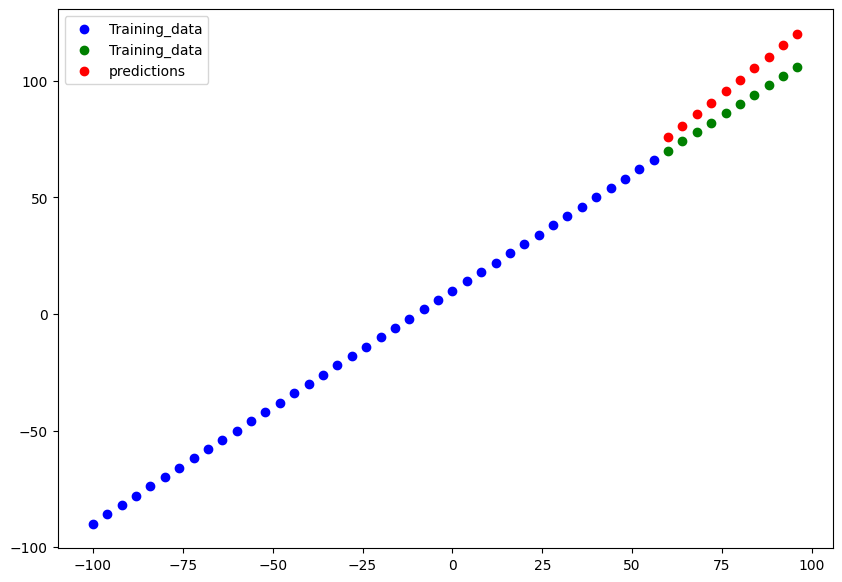

In [40]:
plot_predictions(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    predictions=y_pred)

Evaluation our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluations metrics to evaluate your model's performance.

Since we're working on a regresssion, two of the main metrics:

* MAE - mean absolute error, on average how wrong is each of my model's predict
  Use MAE for less errors less than 100

* MSE - mean square error, square the average errors
  Use MSE for Large errors more than 100

*Huber  - cobination of MSE and MAE

In [41]:
#evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 308ms/step - loss: 9.9339 - mae: 9.9339


[9.933924674987793, 9.933924674987793]

In [42]:
#calculate the absolute error
mae=tf.metrics.mean_absolute_error(y_true= Y_test,
                                  y_pred=tf.constant(y_pred))
mae


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.760332, 11.333453, 10.080009, 10.106708, 11.386853, 13.840426,
       17.467443, 22.267899, 27.201483, 32.13507 ], dtype=float32)>

In [43]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 75.73278 ],
       [ 80.66637 ],
       [ 85.59995 ],
       [ 90.53354 ],
       [ 95.46713 ],
       [100.40071 ],
       [105.334305],
       [110.2679  ],
       [115.201485],
       [120.13507 ]], dtype=float32)>

In [44]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.73278 ,  80.66637 ,  85.59995 ,  90.53354 ,  95.46713 ,
       100.40071 , 105.334305, 110.2679  , 115.201485, 120.13507 ],
      dtype=float32)>

In [46]:
#calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=Y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=9.933924>

In [47]:
#calculate the mean square error
mse=tf.metrics.mean_squared_error(y_true=Y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=105.873436>

#===============================================================================================================================================================
###Running experiments to improve our model

build a model -> fit it -> evaluate it -> tweak it-> fit it -> evaluate it -> tweak it-> evaluate it -> tweak it-> fit it-> evaluate it ....

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger(using a more complex model) - this might come in the form of mre layers or more  hidden units in each layers

3. train for longer - give your model more of a chance to find patterns in the data.


Lets do 3 modelling experiments
1. model1 - same as the original model, 1 layer, trained for 100 epochs

2. model2 -2 layers trained for 100 epochs

3. model3 -2 layers trained for 500 epochs


###build model1


In [48]:
#review this function due to error
#make some functions to reuse MAE and MSE
#functions for numpy predictions
def mae(y_true, y_pred):
 return tf.metrics.mean_absolute_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return  tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

In [49]:
#test samples
import tensorflow as tf
import matplotlib.pyplot as plt
x= tf.range(-100,100,4)
y=x+10
xtrain = x[:40] # first 40 are training samples(80% of the data)
ytrain = y[:40]
xtest = x[40:] #last 10 are testing samples(20& of the data)
ytest = y[40:]



In [50]:
#set random seed
tf.random.set_seed(42)

#1. Create the model
model1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
#3.fit the model
model1.fit(tf.expand_dims(xtrain,axis=-1),ytrain,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 53.9634 - mae: 53.9634
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 20.0793 - mae: 20.0793
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 7.8029 - mae: 7.8029
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 8.7195 - mae: 8.7195
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.8199 - mae: 10.8199
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 10.0058 - mae: 10.0058
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0529 - mae: 9.0529
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0952 - mae: 9.0952
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.9396 - mae: 19.9396
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.7827 - mae: 10.7827
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 74ms/step


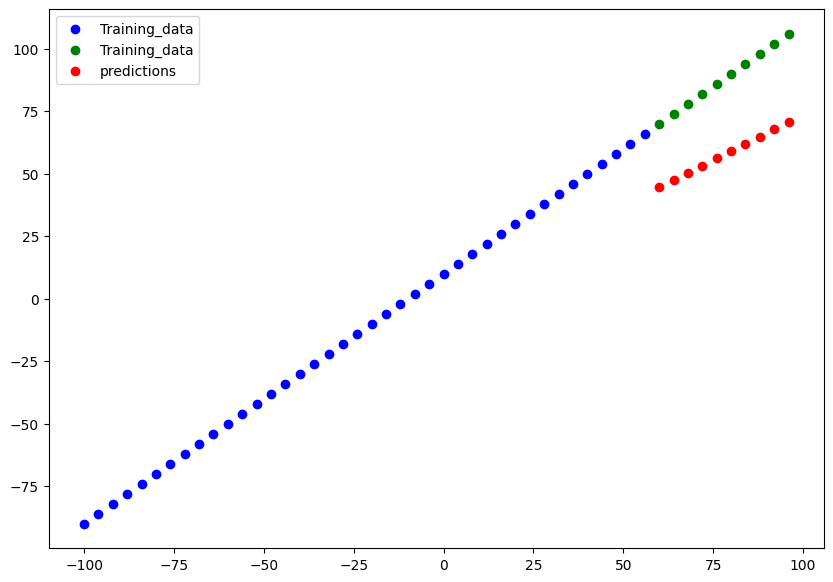

In [51]:
##Make and plot prediction in model1
ypred1=model1.predict(xtest)
plot_predictions(predictions=ypred1)



In [52]:
tf.constant(ypred1), tf.squeeze(ypred1) #observe the shape

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[44.62562],
        [47.51437],
        [50.40312],
        [53.29187],
        [56.18062],
        [59.06937],
        [61.95812],
        [64.84686],
        [67.73561],
        [70.62436]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.62562, 47.51437, 50.40312, 53.29187, 56.18062, 59.06937,
        61.95812, 64.84686, 67.73561, 70.62436], dtype=float32)>)

In [53]:
#calculations model1 evaluation metrics
#dont forget to squeeze due to shape
mae1=mae(ytest,tf.squeeze(ypred1))
#mae1=mae(ytest,ypred1)
mse1=mse(ytest,tf.squeeze(ypred1))
#mse1=mse(ytest,ypred1)
mae1,mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.375006>,
 <tf.Tensor: shape=(), dtype=float32, numpy=932.8289>)

#=========================================================================================================
##Build model2

    *2 dense layers, trained for 100 epochs

In [54]:
#Set the random seed
tf.random.set_seed(42)

#1. Create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])

#3. fit the model
model2.fit(tf.expand_dims(xtrain,axis=-1), ytrain,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 30.2376 - mse: 1445.5608
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 26.1141 - mse: 921.7704
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 29.9347 - mse: 1356.1206
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 16.5651 - mse: 388.1724
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 22.9568 - mse: 774.3658
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.5714 - mse: 125.0779
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5806 - mse: 163.8506
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2697 - mse: 180.7481
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 42.3669 - mse: 2871.4639
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 29.5164 - mse: 1233.4517
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 64ms/step


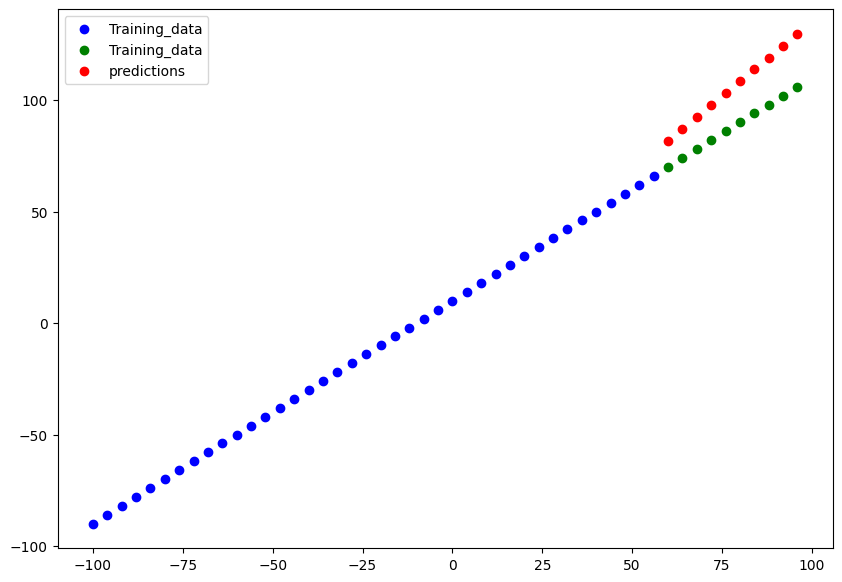

In [55]:
#make and plot predictions of model2
ypred2=model2.predict(xtest)
plot_predictions(predictions=ypred2)

In [56]:
#calculation model2 evaluation matrics
mae2=mae(ytest,tf.squeeze(ypred2))
mse2=mse(ytest,tf.squeeze(ypred2))
mae2,mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=17.734219>,
 <tf.Tensor: shape=(), dtype=float32, numpy=329.15167>)

***Build model3
*2 layers trained for 500 epochs

In [57]:
#set random seed
tf.random.set_seed(42)

#1. create a model
model3=tf.keras.Sequential([
     tf.keras.layers.Dense(10),
     tf.keras. layers.Dense(1)
])

#2. Compile the model
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=[mae])

#3. fit the model
model3.fit(tf.expand_dims(xtrain,axis=-1),ytrain,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 31.9684 - mae: 50.8281
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 27.0725 - mae: 47.9075
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 30.8084 - mae: 43.0929
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 16.9554 - mae: 47.7655
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 19.2863 - mae: 43.5534
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 14.2857 - mae: 57.3848
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.5565 - mae: 53.4211
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.2784 - mae: 53.4734
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 42.3337 - mae: 80.2182
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 29.4859 - mae: 66.3097
Epoch 11/500
2/2 [==============================] - 0s 10

1/1 [==============================] - 0s 120ms/step


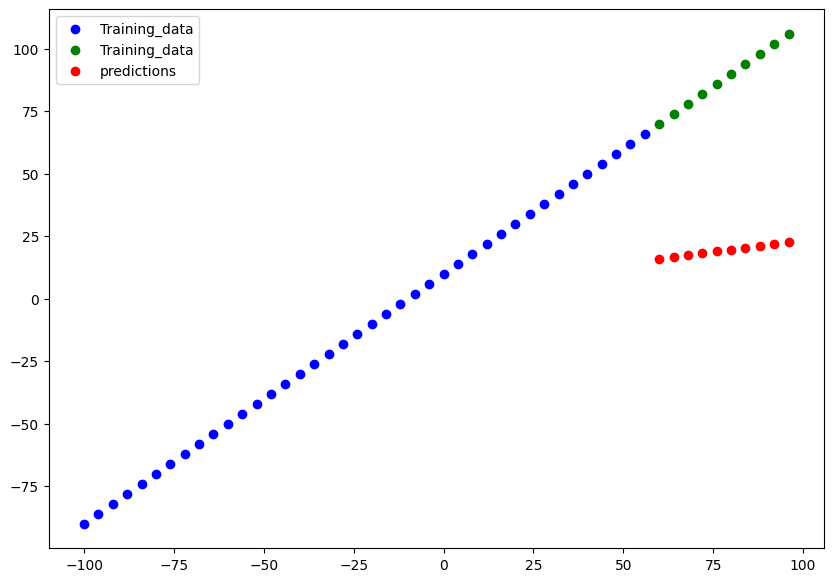

In [58]:
#make and plot some predictions
#virtualize predictions
ypred3=model3.predict(xtest)
plot_predictions(predictions=ypred3)

In [59]:
#calculate model3 evaluation metrics
mae3=mae(ytest,tf.squeeze(ypred3))
mse3=mse(ytest,tf.squeeze(ypred3))
mae3,mse3



(<tf.Tensor: shape=(), dtype=float32, numpy=68.67701>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4802.96>)

🔑Note you wnat to start with small with experiments(small models) and make sure they work and then increasetheir scalewhen necessary.

##comparing the results of our experiments
we've run a few experiments let's compare the results

In [60]:
#let's compare our models reults using pandas dataframe
import pandas as pd
modelresults = [["model1",mae1.numpy(),mse1.numpy()],
                ["model2",mae2.numpy(),mse2.numpy()],
                ["model3",mae3.numpy(),mse3.numpy()]]
allresults = pd.DataFrame(modelresults, columns=["model", "mae", "mse"])
allresults

,model,mae,mse
0,model1,30.375006,932.828918
1,model2,17.734219,329.151672
2,model3,68.677010,4802.959961


#looks like model2 performe the best

In [61]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑Note: One of your main goals should be to minimize the time between your experiments. the more experiments you do, the more things you'll figure out which dont work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto "experiment, experiment, experiment"

##Tracking your experiments

One really good habits in machine learning modelling is to track the reulst of your experiments

and when doing so, it can be tedious if you're running lots of experiments

Luckily, there are tools to help us!!

📖Resourse: As you build more models, you'll want to look into using:

*TensorBoard - a component of TensorFlow libraryto help track modelling experiments(we'll see this one later).

*Weight & Biases - a tool for tracking all kinds of machine learning experiments(plugs straight into Tensor board)

Saving our models

Saving our models allows us to use them outside of goodle colab (or whereever they were trained) such as in web application or a mobile app.

there are two main formats we can sabe our model's too:
1. The SavedModel format
2. The HDF5 format



In [63]:
# Save model using the SavedModel format
model2.save("best_model_savedmodel_format")


In [64]:
#save model using HDF5 format(compression)
model2.save("best_model_HDF5_Format.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Loading in a Saved Model format model


In [70]:
loadsavedmodelformat = tf.keras.models.load_model("best_model_savedmodel_format")
loadsavedmodelformat.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
#compare model2 predictions with savemodel format model predictions

model2pred = model2.predict(xtest)
loadedmodelpred=loadsavedmodelformat.predict(xtest)
model2pred==loadedmodelpred

1/1 [==============================] - 0s 107ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [73]:
mae(y_true=ytest,y_pred=model2pred) == mae(y_true=ytest, y_pred=loadedmodelpred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [74]:
model2pred.squeeze()

array([ 81.73782 ,  87.07036 ,  92.402885,  97.73542 , 103.067955,
       108.40048 , 113.73303 , 119.06555 , 124.398094, 129.7306  ],
      dtype=float32)

In [75]:
loadedmodelpred.squeeze()

array([ 81.73782 ,  87.07036 ,  92.402885,  97.73542 , 103.067955,
       108.40048 , 113.73303 , 119.06555 , 124.398094, 129.7306  ],
      dtype=float32)

In [76]:
#load in model using the .h5 format
loadh5model = tf.keras.models.load_model("/content/best_model_HDF5_Format.h5")
loadh5model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
#Check to see if loaded .h5 model predictions match model2
model2pred = model2.predict(xtest)
loadh5modelpred=loadh5model.predict(xtest)
model2pred == loadh5modelpred

1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

###Download a model(or any other file) from Google Colab

If you want to download your files from
Google Colab:

1. You can go to the "files" tab and right click on the  file you're after and clicking "download"

2. Use code(see the cell below)

3.Save it to Google Drive by connecting Google Drive and copying it there(see 2nd code cell below)

In [79]:
#Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_Format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
#Save a file from Google Colab to Google Drive(requires mounting Google Drive)
!cp/content/best_model_HDF5_Format.h5 /content/drive/MyDrive/tensorflow_course

/bin/bash: line 1: cp/content/best_model_HDF5_Format.h5: No such file or directory


In [81]:
!ls/content/drive/MyDrive/tensorflow_course

/bin/bash: line 1: ls/content/drive/MyDrive/tensorflow_course: No such file or directory


A larger example